# XGBoost

In [1]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/car_insurance.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/car_insurance.parquet')

In [3]:
y_train = train.OUTCOME
X_train = train.drop(columns=['OUTCOME'])

In [4]:
y_validation = validation.OUTCOME
X_validation = validation.drop(columns=['OUTCOME'])

In [7]:
exploratory_depths =[2, 3, 4, 5]
exploratory_estimators = [50, 100, 200, 300]
exploratory_learn_rate = [0.05, 0.1, 0.2, 0.5]

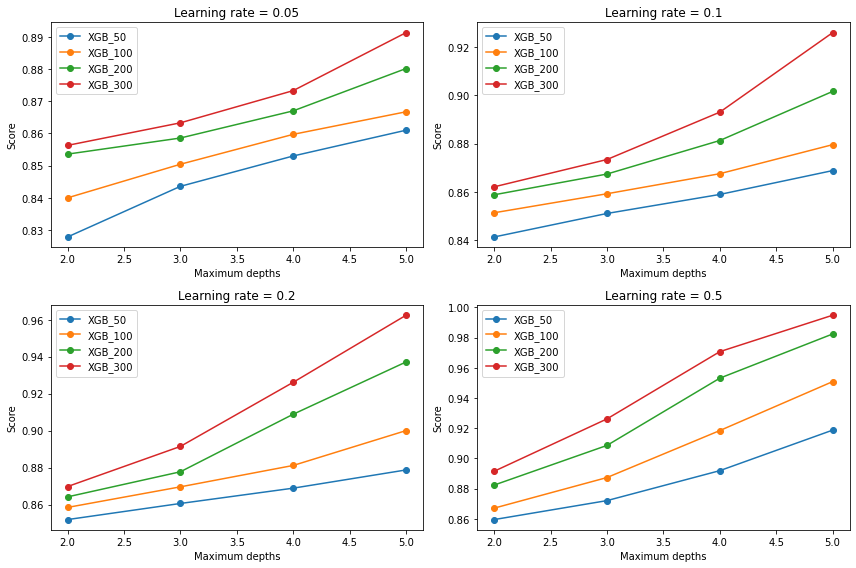

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [XGBClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 0].set_xlabel('Maximum depths')
axs[0, 0].set_ylabel('Score')
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[0, 1].set_xlabel('Maximum depths')
axs[0, 1].set_ylabel('Score')
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 0].set_xlabel('Maximum depths')
axs[1, 0].set_ylabel('Score')
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()
axs[1, 1].set_xlabel('Maximum depths')
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [9]:
max_depth = [3, 4, 5, 6]
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450]
learn_rate = [0.05, 0.1, 0.2, 0.5]

In [10]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(XGBClassifier(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('XGB_'+str(n)+'_'+str(d)+'_'+str(l))

In [11]:
metrics = classification(models_list, names_list, '../../../data/model_output/metrics/car_insurance/xgboost.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
XGB_50_3_0.05,0.186472,0.915116,0.907675,-0.813184
XGB_50_3_0.1,0.199468,0.924486,0.916051,-0.912395
XGB_50_3_0.2,0.173536,0.931684,0.921944,-1.045386
XGB_50_3_0.5,0.167816,0.941574,0.921376,-2.145151
XGB_50_4_0.05,0.213975,0.924512,0.915103,-1.017708
...,...,...,...,...
XGB_450_5_0.5,3.943155,0.999971,0.894137,-10.583694
XGB_450_6_0.05,2.666827,0.983605,0.914798,-6.995389
XGB_450_6_0.1,2.257616,0.995297,0.910502,-8.519565
XGB_450_6_0.2,2.057097,0.999693,0.899786,-9.993853


In [15]:
metrics.sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
XGB_50_3_0.2,0.173536,0.931684,0.921944,-1.045386
XGB_50_3_0.5,0.167816,0.941574,0.921376,-2.145151
XGB_100_3_0.2,0.256042,0.938299,0.921273,-1.814555
XGB_150_4_0.05,0.460298,0.936137,0.920955,-1.621807
XGB_150_5_0.05,0.535091,0.945685,0.920942,-2.616457
...,...,...,...,...
XGB_350_5_0.5,1.162943,0.999889,0.896479,-10.342192
XGB_450_6_0.5,1.786316,0.999998,0.895727,-10.427152
XGB_450_4_0.5,1.262193,0.998686,0.895580,-10.324147
XGB_400_5_0.5,1.918948,0.999955,0.894692,-10.526780


Our best model is **XGB_50_3_0.2**.

In [5]:
test = pd.read_parquet('../../../data/model_input/test_sets/car_insurance.parquet')

In [6]:
y_test = test.OUTCOME
X_test = test.drop(columns=['OUTCOME'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.OUTCOME
X_retrain = retrain.drop(columns=['OUTCOME'])

In [20]:
model = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.2).fit(X_retrain, y_retrain)

In [21]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9288


In [22]:
dump(model, '../../../data/model_output/models/car_insurance/best_xgboost.joblib')

['best_xgboost.joblib']

In [23]:
with open('../../../data/model_output/metrics/car_insurance/final_AUC.txt', 'a') as f:
    f.write('\nXGB, '+ str(auc))

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/car_insurance/best_xgboost.joblib')

In [10]:
train_pred = load_mod.predict_proba(X_retrain)[:, 1]
auc_train = roc_auc_score(y_retrain, train_pred)
test_pred = load_mod.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, test_pred)

In [11]:
import time 
time1 = time.time()
XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.2).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

In [12]:
with open('../../../data/model_output/metrics/car_insurance/final_metrics.txt', 'a') as f:
     f.write(f'\nXGB; {time2}; {auc_train}; {auc_test}')